Data Wrangling

Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"

6

Computer Laboratory –I BE (AI&DS)
Description: The dataset contains information about housing prices in a specific real
estate market. It includes various attributes such as property characteristics, location,
saleprices, and other relevant features. The goal is to perform data wrangling to gain
insightsinto the factors influencing housing prices and prepare the dataset for further
analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing
spaces,special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available
(e.g.,neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time
period,property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot
encoding orlabel encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as
averagesale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [200]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [201]:
df.shape

(13320, 9)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [203]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [204]:
df.dropna(inplace=True)

In [205]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

#### df.head()

In [207]:
df.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [208]:

df.drop(columns=['size'], inplace=True)


In [209]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Nov', '17-Oct', '21-Dec', '19-Sep',
       '20-Sep', '18-Mar', '18-Apr', '20-Aug', '19-Mar', '17-Sep',
       '17-Aug', '19-Apr', '22-Dec', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '18-May', '18-Dec', '21-Jun', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '20-Dec', '18-Jun', '16-Mar',
       '22-Jun', '17-Dec', '21-Feb', '19-May', '17-Nov', '20-Oct',
       '20-Jun', '18-Feb', '19-Feb', '21-Oct', '21-Jan', '17-Mar',
       '19-Jun', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '19-Jul', '20-Jan', '21-Sep', '18-Jan', '20-Mar',
       '19-Nov', '15-Jun', '19-Aug', '20-May', '20-Nov', '20-Jul',
       '20-Feb', '15-Dec', '21-Aug', '16-Oct', '22-Nov', '16-Dec',
       '15-Aug', '17-Jan', '16-Nov', '20-Apr', '22-Jan', '16-Jan',
       '17-Feb', '14-Jul'], dtype=object)

In [210]:
df['area_type'].value_counts()

area_type
Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: count, dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   society       7496 non-null   object 
 4   total_sqft    7496 non-null   object 
 5   bath          7496 non-null   float64
 6   balcony       7496 non-null   float64
 7   price         7496 non-null   float64
 8   bhk           7496 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 585.6+ KB


In [212]:
average_price_by_neighborhood = df.groupby('location')['price'].mean().reset_index()

In [213]:
print(average_price_by_neighborhood)

                           location        price
0                         Banaswadi    35.000000
1                       Bhoganhalli    22.890000
2               Devarabeesana Halli   152.250000
3               Devarachikkanahalli    54.000000
4                   Electronic City    23.250000
..                              ...          ...
629              Yelahanka New Town    45.954545
630                     Yelenahalli    49.000000
631                          Yemlur  1245.000000
632                    Yeshwanthpur    86.455476
633  Yeshwanthpur Industrial Suburb   120.000000

[634 rows x 2 columns]


In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
label_encoder = LabelEncoder()
df['area_type'] = label_encoder.fit_transform(df['area_type'])
df['total_sqft'] = label_encoder.fit_transform(df['total_sqft'])

df['society'] = label_encoder.fit_transform(df['society'])
df['availability'] = label_encoder.fit_transform(df['availability'])
df['location'] = label_encoder.fit_transform(df['location'])

In [216]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,3,35,210,443,63,2.0,1.0,39.07,2
1,2,73,149,2353,1128,5.0,3.0,120.00,4
3,3,73,387,2109,551,3.0,1.0,95.00,3
5,3,73,625,585,192,2.0,1.0,38.00,2
11,2,73,625,1566,1163,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...
13313,3,73,590,100,378,2.0,1.0,57.00,3
13314,3,73,234,2148,725,3.0,3.0,112.00,3
13315,0,73,625,197,1262,4.0,0.0,231.00,5
13317,0,73,490,1168,159,2.0,1.0,60.00,2


In [217]:
import seaborn as sns 


<Axes: ylabel='bhk'>

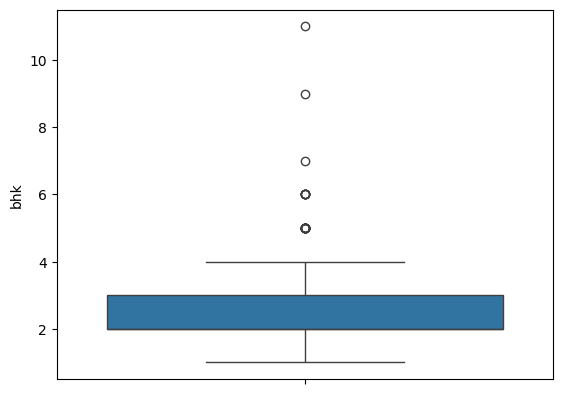

In [218]:
sns.boxplot(df['bhk'])

In [219]:
Q1 = df['bhk'].quantile(0.25)
Q3 = df['bhk'].quantile(0.75)

In [220]:
IQR = Q3- Q1

In [221]:
upper_l = Q3 + 1.5 * IQR
lower_l = Q1 - 1.5 * IQR

In [222]:
df[df['bhk'] > upper_l]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
141,3,35,628,1061,1207,5.0,1.0,213.0,5
459,3,73,8,271,1386,9.0,3.0,360.0,11
483,2,73,16,276,224,5.0,2.0,190.0,5
490,3,73,453,312,1360,7.0,3.0,337.0,5
538,3,73,415,134,1386,9.0,3.0,210.0,9
1535,0,73,149,2353,1247,5.0,2.0,105.0,5
2252,3,73,590,1458,1286,6.0,2.0,120.0,6
2620,3,73,526,1562,150,9.0,1.0,1000.0,6
2739,3,73,224,271,1360,5.0,3.0,250.0,7
2959,3,73,492,1609,1176,5.0,0.0,300.0,5


In [223]:
df1= df[(df['bhk'] <= upper_l ) & (df['bhk'] >= lower_l)]

<Axes: ylabel='bhk'>

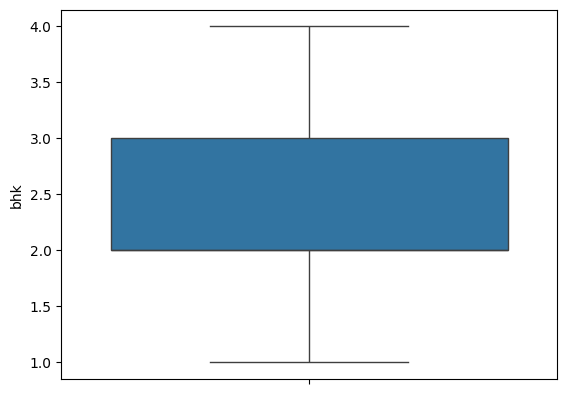

In [224]:
sns.boxplot(df1['bhk']) 